## **Model Simple RNN**

---

Uji Coba #1

Penelitian                             : [link Dataset](https://github.com/katoch99/Twitter-Emotion-Recognition)

### 01. Installing nlp package

In [145]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import random
import numpy as np

from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import seaborn as sns


### 02. Load Data

In [146]:
df = pd.read_csv('..\Dataset\Training\Clean_train_data_nostem.csv')
df.head(20)

,Unnamed: 0,tweet,label
0,0,"['pagi', 'emosi']",Anger
1,1,"['stabilitas', 'negara', 'memange', 'tahun', '...",Anger
2,2,"['emosi', 'liat']",Anger
3,3,"['aib', 'bodoh', 'aib', 'muncul', 'tindakan', ...",Anger
4,4,"['menyebalkan', 'bodoh']",Anger
5,5,"['asli', 'malu', 'maluin', 'indo', 'tolol', 'r...",Anger
6,6,"['drama', 'abg', 'tolol']",Anger
7,7,"['emosi', 'katla', 'kemarin', 'keterangannya',...",Anger
8,8,"['bangsat', 'tribute', 'no', 'bencana', 'no', ...",Anger
9,9,"['pergi', 'teriak', 'nangis', 'sekencang', 'ke...",Anger


In [147]:
print("Null Values:")
df.isna().sum()

Null Values:


Unnamed: 0    0
tweet         0
label         0
dtype: int64

### 03. Label Proposition

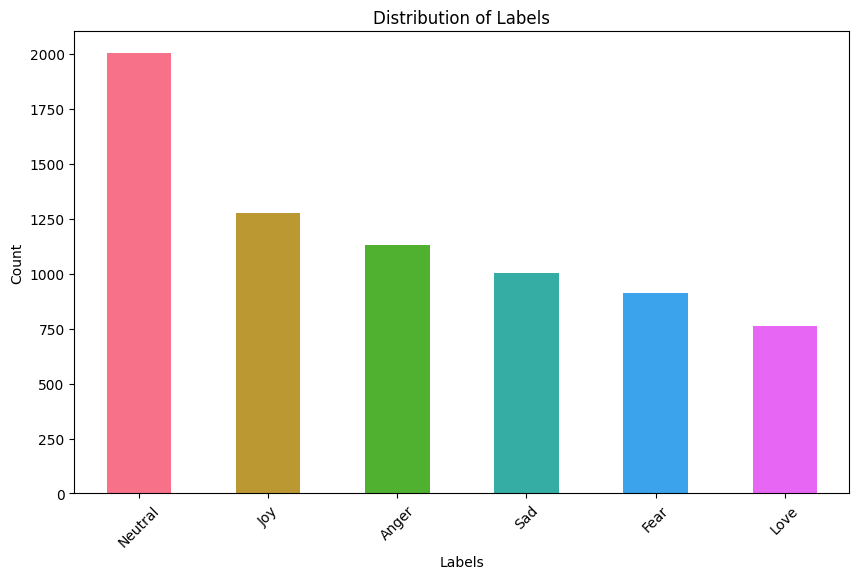

In [148]:
label_counts = df["label"].value_counts()

# Generate a color palette with a unique color for each label
palette = sns.color_palette("husl", len(label_counts))

# Create a bar plot
plt.figure(figsize=(10, 6))
label_counts.plot(kind='bar', color=palette)
plt.title('Distribution of Labels')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


In [149]:
def get_tweets(data):
    tweets = data['tweet'].tolist()
    labels = data['label'].tolist()
    return tweets, labels

tweets, labels = get_tweets(df)

In [150]:
train_tweets, val_tweets, train_labels, val_labels = train_test_split('Tweet', 'Label', test_size=0.2, random_state=42)

In [151]:
data = pd.DataFrame({'Tweet': tweets, 'Label': labels})

train_data, val_data = train_test_split(data, test_size=0.2, random_state=42)

train_tweets = train_data['Tweet'].tolist()
train_labels = train_data['Label'].tolist()
val_tweets = val_data['Tweet'].tolist()
val_labels = val_data['Label'].tolist()

print("Training Tweets:", train_tweets)
print("Training Labels:", train_labels)
print("Validation Tweets:", val_tweets)
print("Validation Labels:", val_labels)


Training Tweets: ["['sayur', 'dhe']", "['makasih', 'kakak', 'bianca', 'nama', 'kakak', 'cantik', 'oh', 'suka', 'suka', 'bagus', 'genrenya', 'horror', 'sukaa', 'genre', 'pilih', 'thriller']", "['aa', 'lucu', 'sannie', 'takut', 'matanya', 'gedee', 'imut']", "['gubernur', 'cumut', 'diam', 'nanggepin', 'keledai', 'bodoh', 'berakibat', 'memalukan', 'diemin', 'tar', 'abis', 'jabatannya']", "['sumpah', 'benci', 'kaya', 'gini', 'suka', 'diam', 'bikin', 'sakit', 'hati', 'ibunya', 'gimana', 'sakit', 'anaknya', 'digituin', 'mb', 'sempurna', 'benci', 'mandang', 'fisik']", "['mari', 'kak', 'viu', 'start', 'puas', 'pakai', 'sebulan', 'req', 'harga', 'payment', 'via', 'shopee', 'pay', 'ditutup', 'shopee', 'pay', 'error', 'ready', 'preset', 'lightroom', 'via', 'gdrive', 'no', 'rush', 'order']", "['suka', 'cinta', 'kagum']", "['komen', 'buruk', 'otaknya', 'kayaknya', 'tolol']", "['kecantikan', 'biazaahh', 'foto', 'model', 'foto', 'konsepnya', 'memikirkan', 'mas', 'crush', 'jadian', 'temenku', 'sedih']"

### Padding and Truncating Sequences

In [152]:
# Tokenizer initialization and fitting on training data
tokenizer = Tokenizer(num_words=10000, oov_token='<UNK>')
tokenizer.fit_on_texts(train_tweets)

print(tokenizer.texts_to_sequences([tweets[10]]))

[[54, 7, 49]]


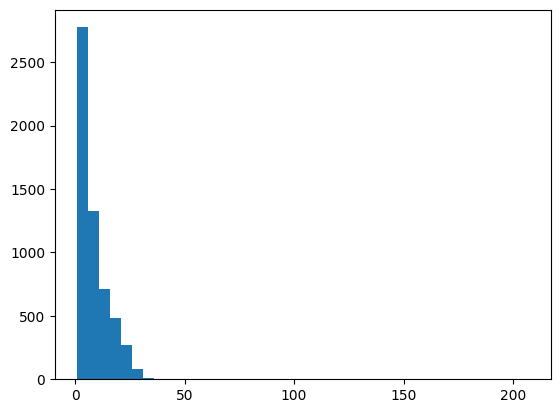

In [153]:
lengths = [len(t.split(' ')) for t in train_tweets]

plt.hist(lengths, bins=len(set(lengths)))
plt.show()

In [154]:
def get_sequences(tokenizer, tweets):
    sequences = tokenizer.texts_to_sequences(tweets)
    if sequences:
        padded_sequences = pad_sequences(sequences, truncating='post', maxlen=50, padding='post')
        return padded_sequences
    else:
        return None

In [155]:
padded_train_sequences = get_sequences(tokenizer, train_tweets)

In [156]:
padded_train_sequences[10]

array([  98,  975,  474,   35,  976,  975, 1384,   39,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0])

### Menyiapkan Label

In [157]:
classes = set(labels)
print(classes)

{'Love', 'Neutral', 'Fear', 'Anger', 'Sad', 'Joy'}


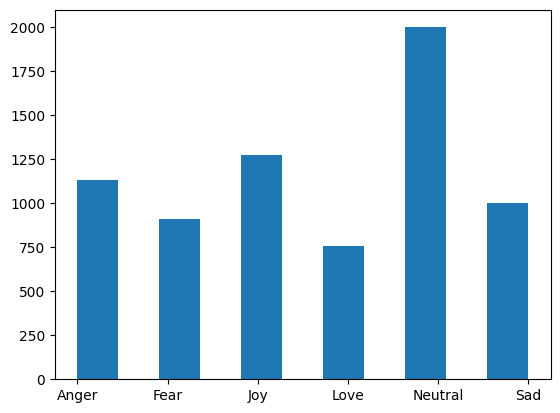

In [158]:
plt.hist(labels, bins=11)
plt.show()

In [159]:
classes_to_index = dict((c, i) for i, c in enumerate(classes))
index_to_classes = dict((v, k) for k, v in classes_to_index.items())

In [160]:
classes_to_index

{'Love': 0, 'Neutral': 1, 'Fear': 2, 'Anger': 3, 'Sad': 4, 'Joy': 5}

In [161]:
names_to_ids = lambda labels: np.array([classes_to_index.get(x) for x in labels])

In [162]:
# Converting text sequences to sequences of integers
padded_train_sequences = get_sequences(tokenizer, train_tweets)
val_sequences = get_sequences(tokenizer, val_tweets)

# Mapping label names to integer indices
train_labels = names_to_ids(train_labels)
val_labels = names_to_ids(val_labels)

In [163]:
print(val_labels)

[4 4 3 ... 1 4 0]


### Modelling

In [164]:
import tensorflow as tf

# Define the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(10000, 8, input_length=50),
    tf.keras.layers.SimpleRNN(20),
    tf.keras.layers.Dense(6, activation='softmax')
])

# Compile the model
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)


c:\Users\TEMP\miniconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [165]:
h = model.fit(
    padded_train_sequences, train_labels,
    validation_data=(val_sequences, val_labels),
    epochs=60,
)


Epoch 1/60
177/177 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.2737 - loss: 1.7328 - val_accuracy: 0.3404 - val_loss: 1.6166
Epoch 2/60
177/177 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.4458 - loss: 1.4439 - val_accuracy: 0.4018 - val_loss: 1.5376
Epoch 3/60
177/177 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.6245 - loss: 1.1220 - val_accuracy: 0.4110 - val_loss: 1.5813
Epoch 4/60
177/177 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.7420 - loss: 0.8823 - val_accuracy: 0.4449 - val_loss: 1.6598
Epoch 5/60
177/177 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.8466 - loss: 0.6259 - val_accuracy: 0.4167 - val_loss: 1.8020
Epoch 6/60
177/177 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8710 - loss: 0.4971 - val_accuracy: 0.4202 - val_loss: 1.8864
Epoch 7/60
177/177 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9066 - loss: 0.3678 - val_accuracy: 0.4103 - val_loss: 2.0777
Epoch 8/60
177/177 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9235 - loss: 0.3069 - val_accu

KeyboardInterrupt: 

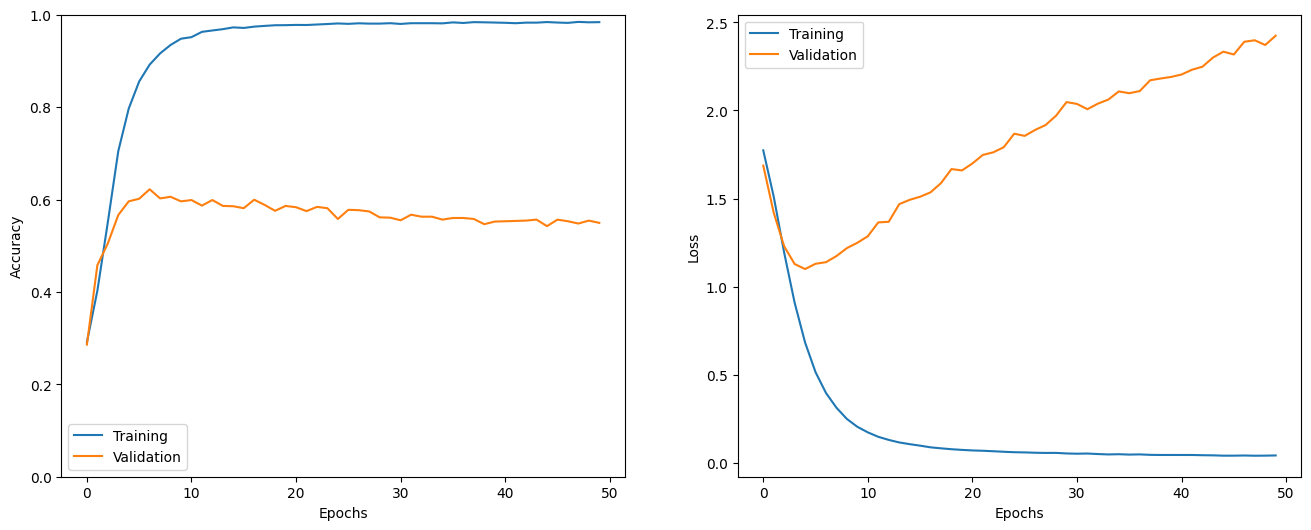

In [ ]:
def show_history(h):
    epochs_trained = len(h.history['loss'])
    plt.figure(figsize=(16, 6))

    plt.subplot(1, 2, 1)
    plt.plot(range(0, epochs_trained), h.history.get('accuracy'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_accuracy'), label='Validation')
    plt.ylim([0., 1.])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(0, epochs_trained), h.history.get('loss'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_loss'), label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

show_history(h)

In [ ]:
test = pd.read_csv('..\Dataset\\Training\\not_preposessing.csv')

In [ ]:
test_tweets, test_labels = get_tweets(test)
test_sequences = get_sequences(tokenizer, test_tweets)
test_labels = names_to_ids(test_labels)

In [ ]:
eval = model.evaluate(test_sequences, test_labels)

222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1774 - loss: 5.8898


In [ ]:
for a in range(0,5):
  i = random.randint(0, len(test_labels) - 1)

  print('Tweet:', test_tweets[i])
  print('Actual Emotion:', index_to_classes[test_labels[i]])
  pred_prob = model.predict(np.expand_dims(test_sequences[i], axis=0))
  predicted_class_index = np.argmax(pred_prob)
  predicted_class = index_to_classes[predicted_class_index]
  
  print('Predicted Emotion:', predicted_class, '\n')

Tweet: iyhh, jadi sepi bngett huhuu
Actual Emotion: Sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
Predicted Emotion: Joy 

Tweet: ket u gak takut kuliah hukum kah ket?
Actual Emotion: Fear
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Predicted Emotion: Joy 

Tweet: setelah kucing gua udh di steril selama 13 hari itu udah dikurung dirumah, dan hari ini kabur dong main lagi ke rumah si tetangga sinting ini langsung gua kejar eh berharap gak ketemu dia tau2 malah sapaan ketemu amnjing bener dah bangsat
Actual Emotion: Anger
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Predicted Emotion: Joy 

Tweet: ternyata abang masih inget dirikyuu jadi pengen malu akyuu
Actual Emotion: Joy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Predicted Emotion: Joy 

Tweet: gue bersyukur banget kalo liat ada cowok yang stand with the victims. karena sesama cewek aja kadang suka ngejatohin victims dan bilang, "gue juga cewek tapi gue ga gitu."
Actual Emotion: Love
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Predicted Emotion: Joy 

